In [1]:
# Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [2]:
olivetti.data.size

1638400

In [3]:
olivetti.target.size

400

In [4]:
X_train = olivetti.data
y_train = olivetti.target

In [5]:
# Use PCA to reduce the dimensionality of the dataset. On your initial run, keep 95% of the information content.

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)

pca.n_components_

123

In [6]:
from sklearn.cluster import KMeans

k_range = range(120, 121)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=120


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

In [8]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

In [9]:
best_model = kmeans_per_k[best_index]

Cluster 0


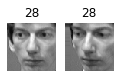

Cluster 1


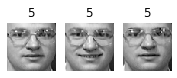

Cluster 2


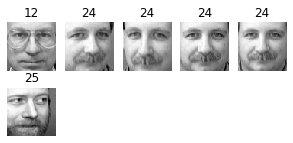

Cluster 3


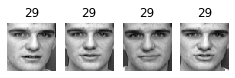

Cluster 4


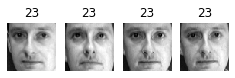

Cluster 5


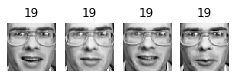

Cluster 6


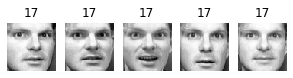

Cluster 7


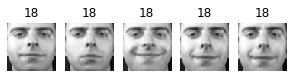

Cluster 8


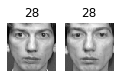

Cluster 9


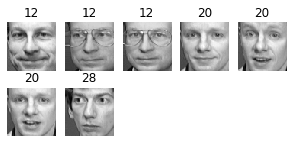

Cluster 10


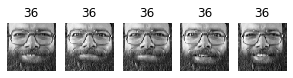

Cluster 11


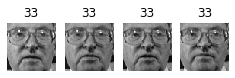

Cluster 12


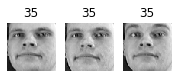

Cluster 13


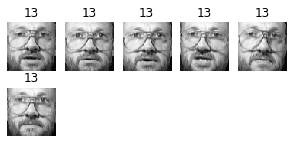

Cluster 14


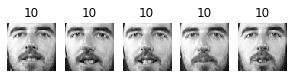

Cluster 15


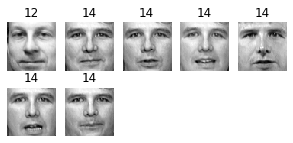

Cluster 16


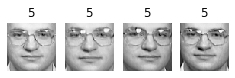

Cluster 17


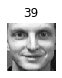

Cluster 18


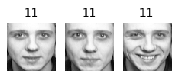

Cluster 19


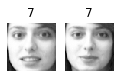

Cluster 20


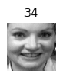

Cluster 21


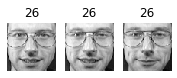

Cluster 22


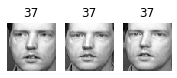

Cluster 23


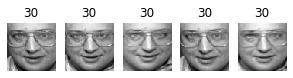

Cluster 24


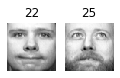

Cluster 25


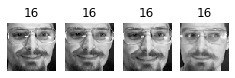

Cluster 26


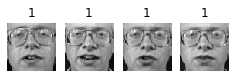

Cluster 27


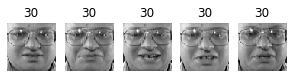

Cluster 28


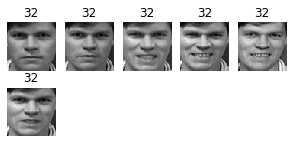

Cluster 29


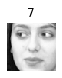

Cluster 30


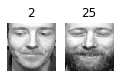

Cluster 31


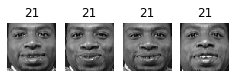

Cluster 32


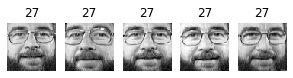

Cluster 33


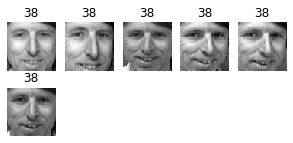

Cluster 34


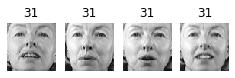

Cluster 35


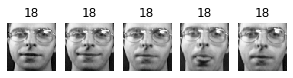

Cluster 36


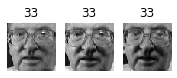

Cluster 37


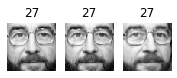

Cluster 38


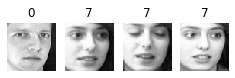

Cluster 39


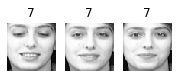

Cluster 40


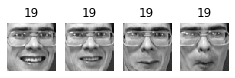

Cluster 41


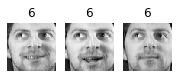

Cluster 42


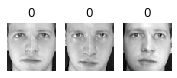

Cluster 43


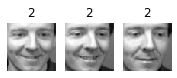

Cluster 44


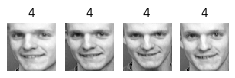

Cluster 45


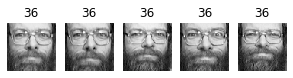

Cluster 46


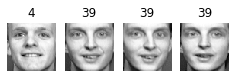

Cluster 47


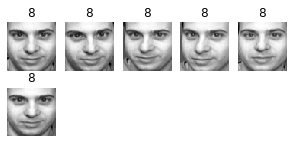

Cluster 48


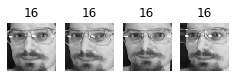

Cluster 49


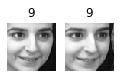

Cluster 50


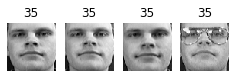

Cluster 51


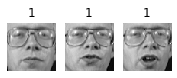

Cluster 52


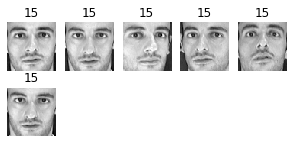

Cluster 53


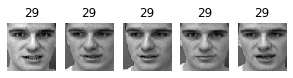

Cluster 54


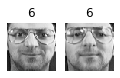

Cluster 55


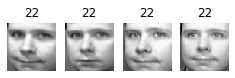

Cluster 56


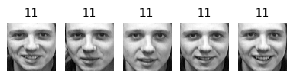

Cluster 57


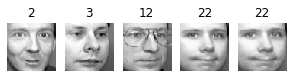

Cluster 58


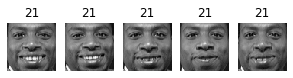

Cluster 59


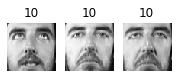

Cluster 60


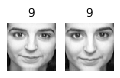

Cluster 61


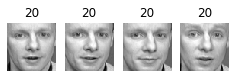

Cluster 62


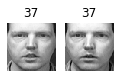

Cluster 63


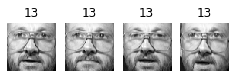

Cluster 64


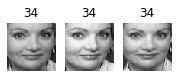

Cluster 65


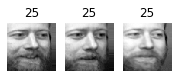

Cluster 66


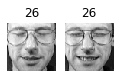

Cluster 67


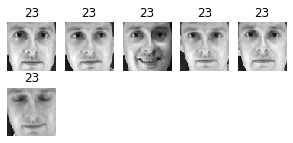

Cluster 68


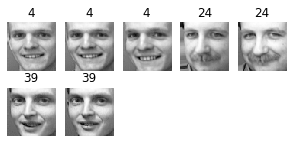

Cluster 69


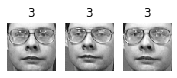

Cluster 70


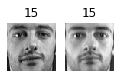

Cluster 71


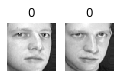

Cluster 72


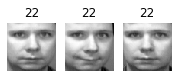

Cluster 73


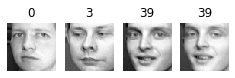

Cluster 74


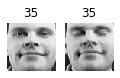

Cluster 75


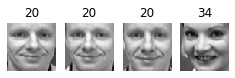

Cluster 76


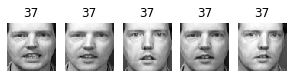

Cluster 77


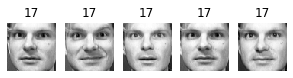

Cluster 78


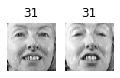

Cluster 79


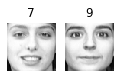

Cluster 80


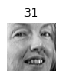

Cluster 81


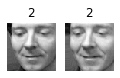

Cluster 82


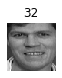

Cluster 83


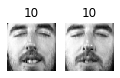

Cluster 84


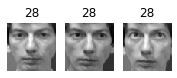

Cluster 85


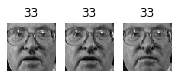

Cluster 86


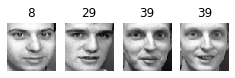

Cluster 87


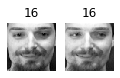

Cluster 88


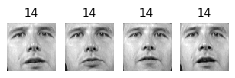

Cluster 89


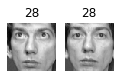

Cluster 90


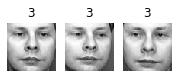

Cluster 91


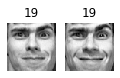

Cluster 92


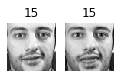

Cluster 93


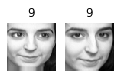

Cluster 94


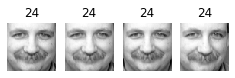

Cluster 95


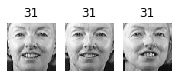

Cluster 96


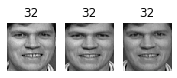

Cluster 97


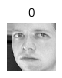

Cluster 98


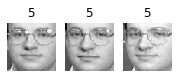

Cluster 99


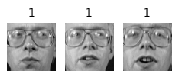

Cluster 100


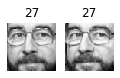

Cluster 101


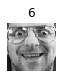

Cluster 102


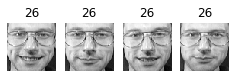

Cluster 103


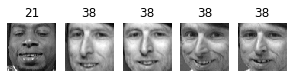

Cluster 104


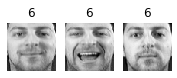

Cluster 105


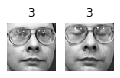

Cluster 106


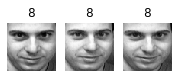

Cluster 107


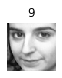

Cluster 108


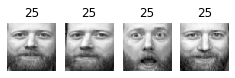

Cluster 109


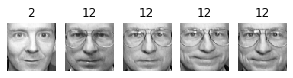

Cluster 110


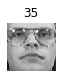

Cluster 111


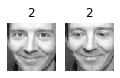

Cluster 112


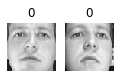

Cluster 113


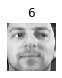

Cluster 114


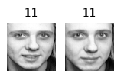

Cluster 115


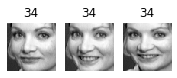

Cluster 116


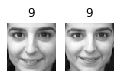

Cluster 117


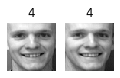

Cluster 118


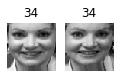

Cluster 119


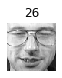

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

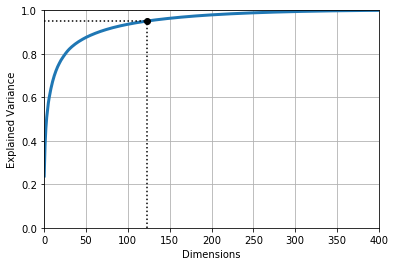

In [11]:
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.grid(True)
plt.show()

In [12]:
k_range = range(100, 200, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150
k=155
k=160
k=165
k=170
k=175
k=180
k=185
k=190
k=195


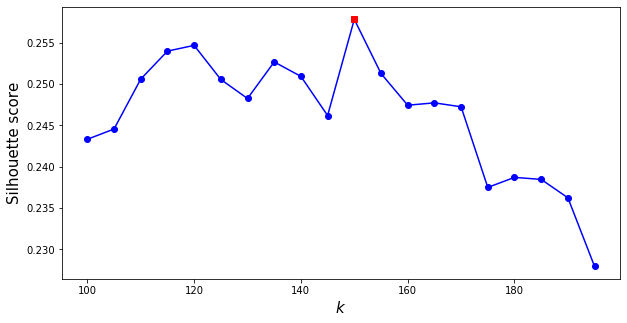

In [17]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=15)
plt.ylabel("Silhouette score", fontsize=15)
plt.plot(best_k, best_score, "rs") 

plt.show()

In [18]:
best_k

150

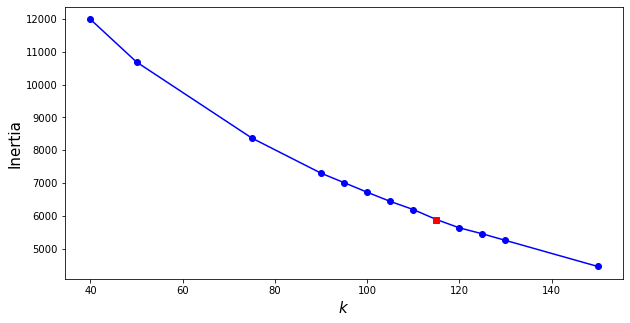

In [23]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=15)
plt.ylabel("Inertia", fontsize=15)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [19]:
best_model = kmeans_per_k[best_index]

Cluster 0


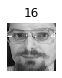

Cluster 1


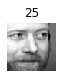

Cluster 2


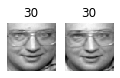

Cluster 3


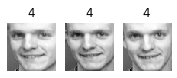

Cluster 4


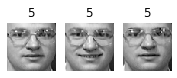

Cluster 5


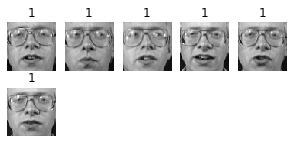

Cluster 6


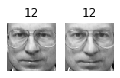

Cluster 7


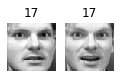

Cluster 8


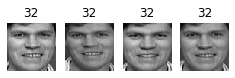

Cluster 9


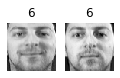

Cluster 10


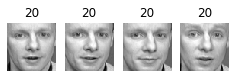

Cluster 11


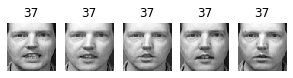

Cluster 12


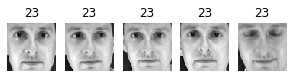

Cluster 13


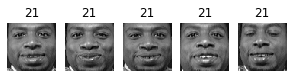

Cluster 14


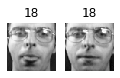

Cluster 15


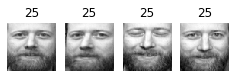

Cluster 16


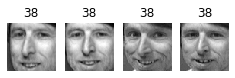

Cluster 17


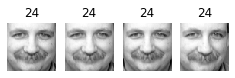

Cluster 18


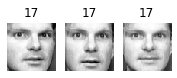

Cluster 19


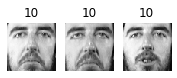

Cluster 20


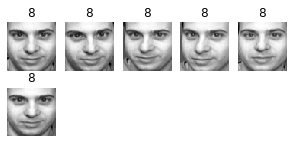

Cluster 21


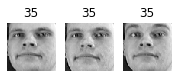

Cluster 22


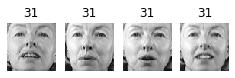

Cluster 23


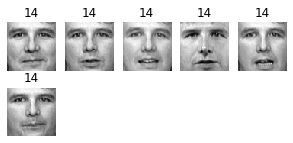

Cluster 24


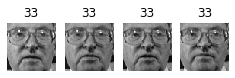

Cluster 25


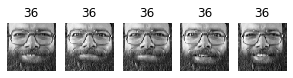

Cluster 26


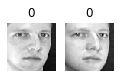

Cluster 27


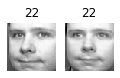

Cluster 28


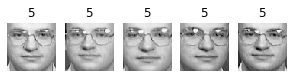

Cluster 29


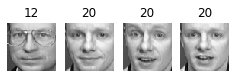

Cluster 30


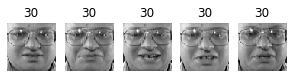

Cluster 31


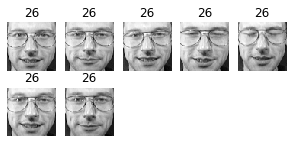

Cluster 32


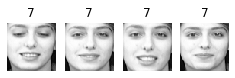

Cluster 33


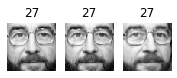

Cluster 34


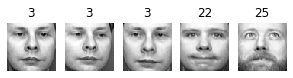

Cluster 35


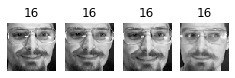

Cluster 36


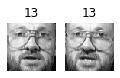

Cluster 37


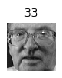

Cluster 38


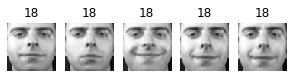

Cluster 39


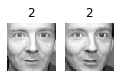

Cluster 40


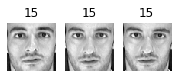

Cluster 41


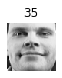

Cluster 42


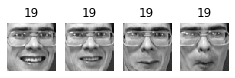

Cluster 43


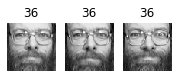

Cluster 44


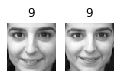

Cluster 45


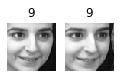

Cluster 46


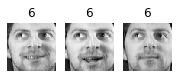

Cluster 47


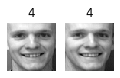

Cluster 48


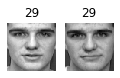

Cluster 49


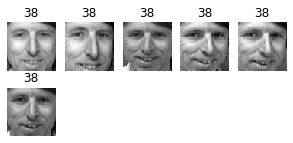

Cluster 50


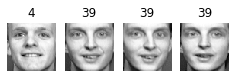

Cluster 51


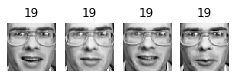

Cluster 52


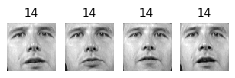

Cluster 53


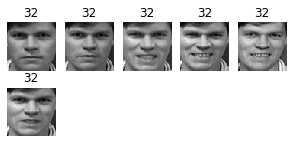

Cluster 54


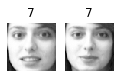

Cluster 55


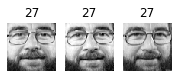

Cluster 56


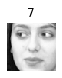

Cluster 57


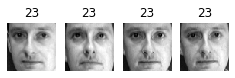

Cluster 58


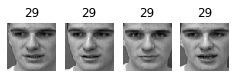

Cluster 59


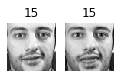

Cluster 60


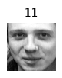

Cluster 61


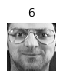

Cluster 62


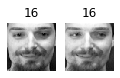

Cluster 63


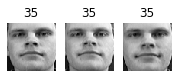

Cluster 64


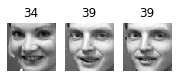

Cluster 65


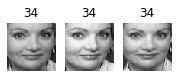

Cluster 66


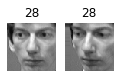

Cluster 67


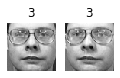

Cluster 68


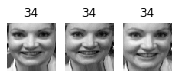

Cluster 69


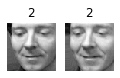

Cluster 70


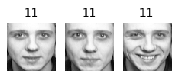

Cluster 71


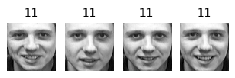

Cluster 72


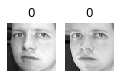

Cluster 73


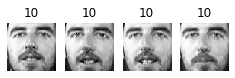

Cluster 74


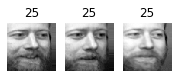

Cluster 75


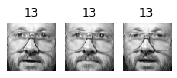

Cluster 76


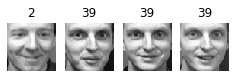

Cluster 77


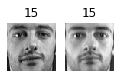

Cluster 78


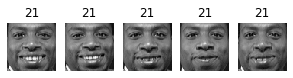

Cluster 79


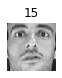

Cluster 80


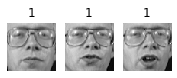

Cluster 81


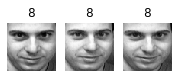

Cluster 82


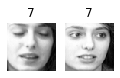

Cluster 83


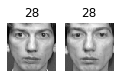

Cluster 84


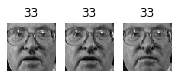

Cluster 85


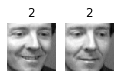

Cluster 86


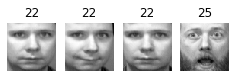

Cluster 87


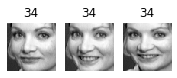

Cluster 88


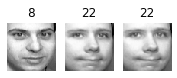

Cluster 89


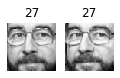

Cluster 90


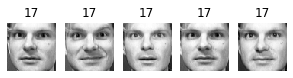

Cluster 91


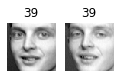

Cluster 92


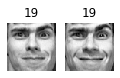

Cluster 93


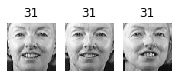

Cluster 94


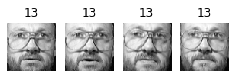

Cluster 95


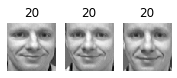

Cluster 96


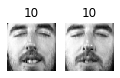

Cluster 97


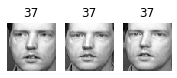

Cluster 98


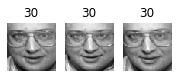

Cluster 99


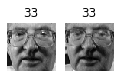

Cluster 100


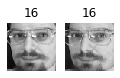

Cluster 101


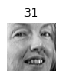

Cluster 102


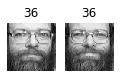

Cluster 103


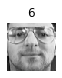

Cluster 104


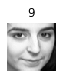

Cluster 105


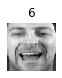

Cluster 106


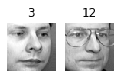

Cluster 107


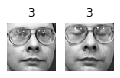

Cluster 108


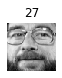

Cluster 109


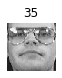

Cluster 110


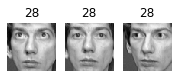

Cluster 111


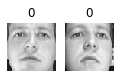

Cluster 112


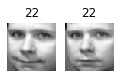

Cluster 113


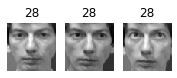

Cluster 114


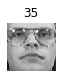

Cluster 115


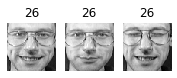

Cluster 116


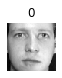

Cluster 117


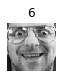

Cluster 118


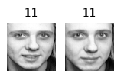

Cluster 119


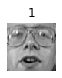

Cluster 120


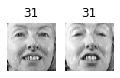

Cluster 121


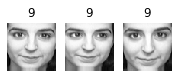

Cluster 122


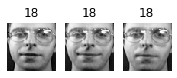

Cluster 123


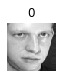

Cluster 124


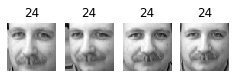

Cluster 125


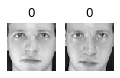

Cluster 126


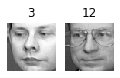

Cluster 127


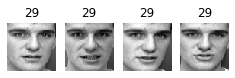

Cluster 128


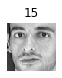

Cluster 129


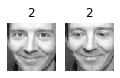

Cluster 130


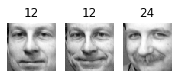

Cluster 131


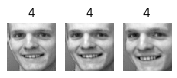

Cluster 132


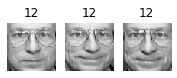

Cluster 133


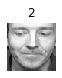

Cluster 134


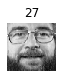

Cluster 135


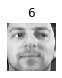

Cluster 136


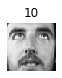

Cluster 137


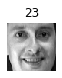

Cluster 138


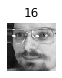

Cluster 139


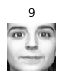

Cluster 140


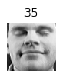

Cluster 141


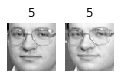

Cluster 142


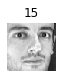

Cluster 143


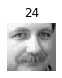

Cluster 144


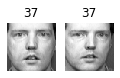

Cluster 145


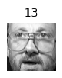

Cluster 146


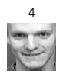

Cluster 147


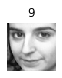

Cluster 148


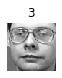

Cluster 149


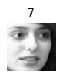

In [20]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [24]:
print ("  PCA \t\t   K \t\t Number of Pure Clusters \t\t Num Clusters w/ >1 member")
print ("-----------------------------------------------------------------------------------------------------")

for i in [0.85, 0.90, 0.95, 0.99, 0.999, 0.9999]:
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train)
    
    k_range = [40, 50, 75, 90, 95, 100, 105, 110, 115, 120, 125, 130]
    kmeans_per_k = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
        kmeans_per_k.append(kmeans)
        
        silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                         for model in kmeans_per_k]
        best_index = np.argmax(silhouette_scores)
        best_k = k_range[best_index]
        best_score = silhouette_scores[best_index]

        inertias = [model.inertia_ for model in kmeans_per_k]
        best_inertia = inertias[best_index]

        best_model = kmeans_per_k[best_index]

        countOfSizeGreater1 = 0
        countOfPure = 0
        for cluster_id in np.unique(best_model.labels_):
            in_cluster = best_model.labels_==cluster_id
            faces = X_train[in_cluster].reshape(-1, 64, 64)
            labels = y_train[in_cluster]
            if labels.size > 1:
                countOfSizeGreater1 += 1
                for j in range(0, labels.size, 1):
                    minItem = np.min(labels)
                    maxItem = np.max(labels)
                    if minItem == maxItem:
                        countOfPure += 1
        print("%.4f          %4d                   %4d                                     %4d" %(i, k, countOfPure, countOfSizeGreater1))

  PCA 		   K 		 Number of Pure Clusters 		 Num Clusters w/ >1 member
-----------------------------------------------------------------------------------------------------
0.8500            40                    132                                       40
0.8500            50                    171                                       50
0.8500            75                    212                                       75
0.8500            90                    273                                       88
0.8500            95                    270                                       92
0.8500           100                    276                                       96
0.8500           105                    309                                      100
0.8500           110                    310                                      103
0.8500           115                    316                                      106
0.8500           120                    323                     